## US Flight Analysis
#### by Arun Leo Prakash
##### Aug-2019

## Investigation Overview

> In this investigation on the US Flights for 2008, I wanted to look at the no of Flights, Delays & Cancellations segregated by hour, day, month. Peak hours, cause of delays & cancellations are primary goals for this investigation. Top Carriers, Plane Manufacturers by #of flights operated, along with delay information is also performed in this investigation.

## Dataset Overview

> The data set has approx 7 million US flights entries including cancelled & delayed flight information for 2008. Supplement data plane, carrier, airport were merged to the flight data to provide some additional information about the flights. Data cleanup was performed on this data that involves removal of diverted flights, missing plane manufacturer details & outliers on Airtime .

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_2008_clean = pd.read_csv('df_2008_clean.csv')
df_2008_cancel = pd.read_csv('df_2008_cancel.csv')
df_2008_delays = pd.read_csv('df_2008_delays.csv')


In [4]:
df_2008_clean_mfg = df_2008_clean.groupby('Manufacturer')['FlightNum'].count()
df_2008_clean_mfg = df_2008_clean_mfg.reset_index()

df_2008_clean_mfg = df_2008_clean_mfg.sort_values('FlightNum', ascending=False)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## #Flight vs #Cancellations - Flight Manufacturer

> There are 6 Major Flight manufacturers contribute 80+% of the overall flights in US in year 2008. #Flights vs Delays were performed to understand which flights were contributing higher #flights as well as cancellations.
Boeing contributed high number of flights, and Bombarder flights had more number of cancellation though it was contributing less than 50% of the Boeing flights.

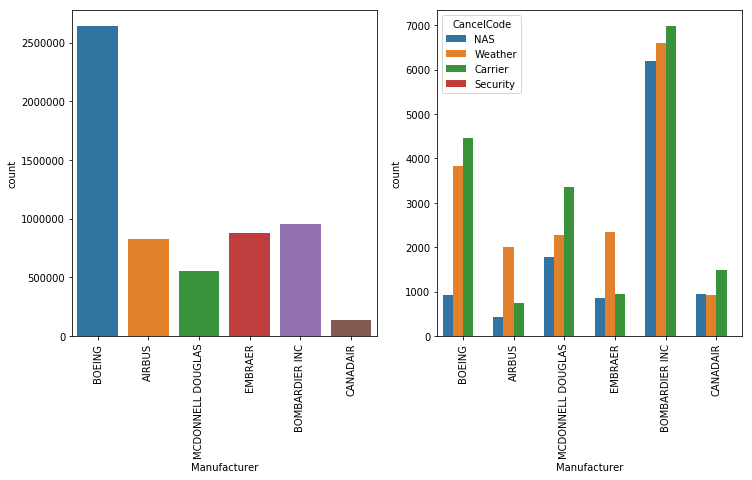

In [10]:
fig = plt.figure(figsize=(12,6));
plt.subplot(1, 2, 1);

sb.countplot(data = df_2008_clean, x = 'Manufacturer');
plt.xticks(rotation=90);

plt.subplot(1, 2, 2);

sb.countplot(data = df_2008_cancel, x = 'Manufacturer', hue = 'CancelCode');
plt.xticks(rotation=90);

## #Flight vs #Delay - Carriers

> Top 10 Carriers by no of flights operated and top 10 Carriers with high no of delays were taken in this report.

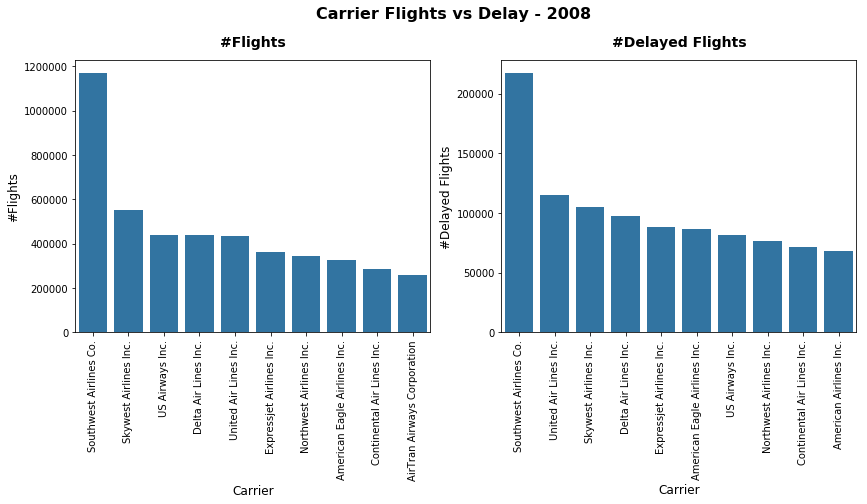

In [11]:
plt.figure(figsize = [14, 5]);
plt.suptitle('Carrier Flights vs Delay - 2008', y=1.03, fontsize=16, fontweight='semibold');

# code for the bar chart
df_flights = df_2008_clean.groupby(['Carrier'])['FlightNum'].count()
df_flights = df_flights.reset_index()
df_flights = df_flights.rename(columns={'FlightNum':'Count'})
df_flights = df_flights.sort_values('Count', ascending=False).head(10)

plt.subplot(1, 2, 1);
g = sb.barplot(data=df_flights, x="Carrier", y='Count', color=base_color);
g.set_title('#Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Carrier', fontsize=12);
g.set_ylabel('#Flights', fontsize=12);
plt.xticks(rotation=90);

plt.subplot(1, 2, 2);

df_top_delays = df_2008_delays.groupby(['Carrier'])['FlightNum'].count()
df_top_delays = df_top_delays.reset_index()
df_top_delays = df_top_delays.rename(columns={'FlightNum':'Count'})
df_top_delays = df_top_delays.sort_values('Count', ascending=False).head(10)

g = sb.barplot(data=df_top_delays, x="Carrier", y='Count', color=base_color);
g.set_title('#Delayed Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Carrier', fontsize=12);
g.set_ylabel('#Delayed Flights', fontsize=12);
plt.xticks(rotation=90);

## Monthly Comparison - Flights, Delays & Cancellations

> This report gives a monthly breakup of flights, delays and cancellations. 
The report clearly points about the reduction of flights and increase of delays and cancellations during Winter.

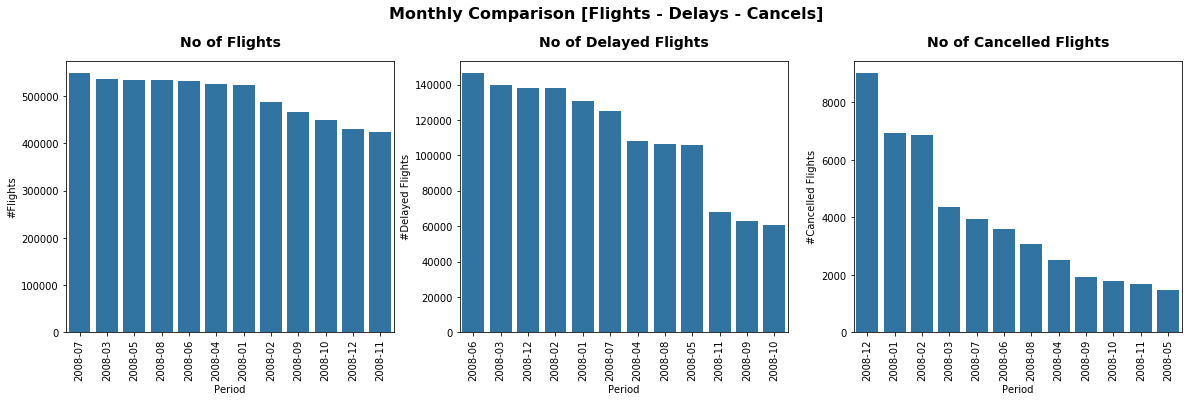

In [9]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [20, 5]);
plt.suptitle('Monthly Comparison [Flights - Delays - Cancels]', y=1.03, fontsize=16, fontweight='semibold');

# code for the bar chart
plt.subplot(1, 3, 1);
g = sb.countplot(data=df_2008_clean, x="Period", order=df_2008_clean.Period.value_counts().index, 
                     color = base_color);
g.set_title('No of Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Period');
g.set_ylabel('#Flights');
plt.xticks(rotation=90);

plt.subplot(1, 3, 2);

g = sb.countplot(data=df_2008_delays, x="Period", order=df_2008_delays.Period.value_counts().index, 
                     color = base_color);
g.set_title('No of Delayed Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Period');
g.set_ylabel('#Delayed Flights');
plt.xticks(rotation=90);

# code for the pie chart
plt.subplot(1, 3, 3);
g = sb.countplot(data=df_2008_cancel, x="Period", order=df_2008_cancel.Period.value_counts().index, 
                     color = base_color);
g.set_title('No of Cancelled Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Period');
g.set_ylabel('#Cancelled Flights');
plt.xticks(rotation=90);

## Hourly comparison of Flights and Delays
> This report is to capture the peak hours, days.
The report indicates that 6 AM during weekdays has the highest no of flights, which points out the travel demand for work.
Highest delays were shows during Friday's between 4-6 PM.


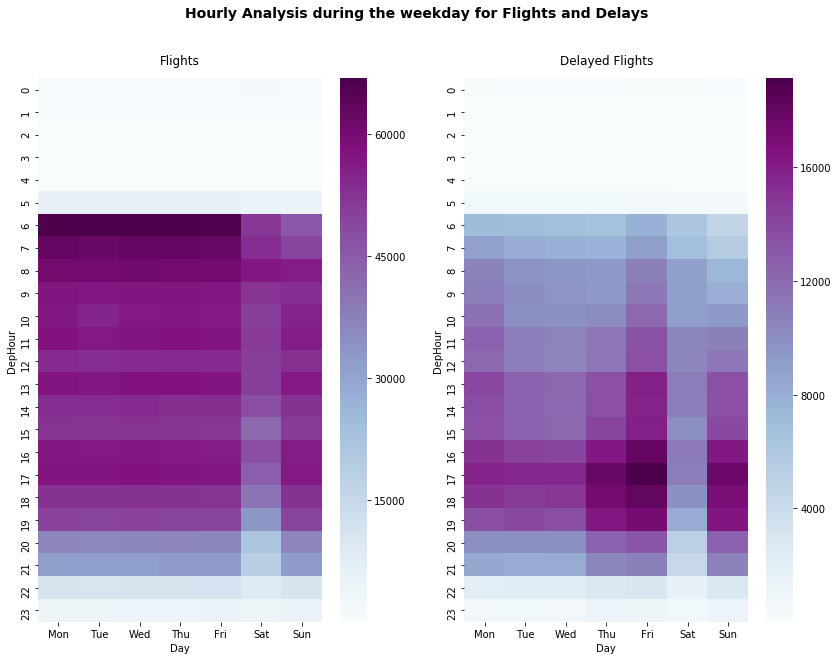

In [7]:
# Setting the weekday order
df_2008_clean['Day'] = pd.Categorical(df_2008_clean['Day'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

df_2008_delays['Day'] = pd.Categorical(df_2008_delays['Day'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

plt.figure(figsize=(14,10));
plt.suptitle('Hourly Analysis during the weekday for Flights and Delays', fontsize=14, fontweight='semibold');

# heatmap for Flights
plt.subplot(1, 2, 1);
df_flights = df_2008_clean.groupby(["DepHour", "Day"])["FlightNum"].size().reset_index();
df_flights = df_flights.pivot("DepHour", "Day", "FlightNum");
sb.heatmap(df_flights, cmap="BuPu");

plt.title("Flights", y=1.015);

# heatmap for delays
plt.subplot(1, 2, 2);
df_delayflights = df_2008_delays.groupby(["DepHour", "Day"])["FlightNum"].size().reset_index();
df_delayflights = df_delayflights.pivot("DepHour", "Day", "FlightNum");
sb.heatmap(df_delayflights, cmap="BuPu");

plt.title("Delayed Flights", y=1.015);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

## Summary

> In US the highest no of flight operations are during **6 AM** during weekdays, and during this time there are minimal delays and it could relate to work related daily commutes. 
Regards to delays and cancellations, **winter** seems to be the major cause during with notable high during december.
Carriers **Southwest, Skywest and US Airways** are ranking with top 3 flight operations among which US Airways with lesser delays in ranking. Manufacturer **Boeing** flights are operated with 47% and with minimal delays.